In [1]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
from scipy.interpolate import interp1d
from sklearn.metrics import r2_score
# Get the current working directory
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

null_MSS=pd.read_csv(parent_dir+'/Main Analysis/Results/Mutation_probabilities_MSS.csv')

def reproduce_dataset(original_dataframe):
    reproduced_dataset = []
    for _, row in original_dataframe.iterrows():
        entry, count = row['Type'], row['Counts']
        reproduced_dataset.extend([entry] * count)
    return pd.DataFrame({'Type': reproduced_dataset})


In [8]:
Types_double=[[0,0],[1,1],[2,2],[3,3],[0,1],[1,2],[1,3],[0,2],[2,3],[0,3],[0],[1],[2],[3],[0,0.5],[1,0.5],[2,0.5],[3,0.5]]
null_MSS['Type'] =Types_double
null_MSS['Type'] =null_MSS['Type'].apply(tuple)

In [9]:


def progression_probability(df,null_=null):
    entry_count=[]
    for t in list(null_['Type']):
        entry_count.append(len(df[df['Type'] == t]))


    null_['Counts']=entry_count
    null_['Frequency']=np.asarray(entry_count)/sum(np.asarray(entry_count))
    
    
    probs=np.asarray(null_['Frequency'])/np.asarray(null_['Probabilities'])
    probs=probs/sum(probs)
    null_['Progression']=probs
    
    return np.asarray(null_['Progression'])

    
    
    
    
def max_20AARs(df,null_=null):
    entry_count=[]
    for t in list(null_['Type']):
        entry_count.append(len(df[df['Type'] == t]))


    null_['Counts']=entry_count
    
    
    
    nullc=null_.groupby('20AARs',as_index=False).sum()

    nullc['Frequency']=nullc['Counts']/sum(nullc['Counts'])    
    
    probs=np.asarray(nullc['Frequency'])/np.asarray(nullc['Probabilities'])
    probs=probs/sum(probs)
    
    
    nullc['Progression']=probs
    
    max_row_index = nullc['Progression'].idxmax()
    value_in_column1 = nullc.loc[max_row_index, '20AARs']
    
    
    
    return int(value_in_column1)

    

    
    
def mean_20AARs(df,null_=null):
    entry_count=[]
    for t in list(null_['Type']):
        entry_count.append(len(df[df['Type'] == t]))


    null_['Counts']=entry_count

        
    nullc=null_.groupby('20AARs',as_index=False).sum()
    
    nullc = nullc.sort_values(by='20AARs')


    nullc['Frequency']=nullc['Counts']/sum(nullc['Counts'])
    
    
    probs=np.asarray(nullc['Frequency'])/np.asarray(nullc['Probabilities'])
    probs=probs/sum(probs)
    m=0
    
    for n in np.arange(7):
        m+=n*probs[n]
    return m
        
def progression_probability(df,null_=null):
    entry_count=[]
    for t in list(null_['Type']):
        entry_count.append(len(df[df['Type'] == t]))


    null_['Counts']=entry_count
    null_['Frequency']=np.asarray(entry_count)/sum(np.asarray(entry_count))
    
    
    probs=np.asarray(null_['Frequency'])/np.asarray(null_['Probabilities'])
    probs=probs/sum(probs)
    null_['Progression']=probs
    
    return np.asarray(null_['Progression'])

    
    
    
    
def max_20AARs(df,null_=null):
    entry_count=[]
    for t in list(null_['Type']):
        entry_count.append(len(df[df['Type'] == t]))


    null_['Counts']=entry_count
    
    
    
    nullc=null_.groupby('20AARs',as_index=False).sum()

    nullc['Frequency']=nullc['Counts']/sum(nullc['Counts'])    
    
    probs=np.asarray(nullc['Frequency'])/np.asarray(nullc['Probabilities'])
    probs=probs/sum(probs)
    
    
    nullc['Progression']=probs
    
    max_row_index = nullc['Progression'].idxmax()
    value_in_column1 = nullc.loc[max_row_index, '20AARs']
    
    
    
    return int(value_in_column1)

    

    
    
def mean_20AARs(df,null_=null):
    entry_count=[]
    for t in list(null_['Type']):
        entry_count.append(len(df[df['Type'] == t]))


    null_['Counts']=entry_count

        
    nullc=null_.groupby('20AARs',as_index=False).sum()
    
    nullc = nullc.sort_values(by='20AARs')


    nullc['Frequency']=nullc['Counts']/sum(nullc['Counts'])
    
    
    probs=np.asarray(nullc['Frequency'])/np.asarray(nullc['Probabilities'])
    probs=probs/sum(probs)
    m=0
    
    for n in np.arange(7):
        m+=n*probs[n]
    return m
        
    
        
    
def progression_probability_20AARs(df,null_=null):
    
    entry_count=[]
    for t in list(null_['Type']):
        entry_count.append(len(df[df['Type'] == t]))


    null_['Counts']=entry_count

        
    nullc=null_.groupby('20AARs',as_index=False).sum()
    
    nullc = nullc.sort_values(by='20AARs')


    nullc['Frequency']=nullc['Counts']/sum(nullc['Counts'])
    
    
    probs=np.asarray(nullc['Frequency'])/np.asarray(nullc['Probabilities'])
    probs=probs/sum(probs)
    
    
    nullc['Progression']=probs

    return np.asarray(   nullc['Progression'])

    
    
def bootstrap_func_values_ci(dataframe, func, n_iterations, confidence_level,*args):
    """
    Perform bootstrapping to find the mean and confidence intervals of multiple values obtained using a user-defined function.

    Parameters:
    - dataframe: Pandas DataFrame containing the data.
    - column: Name of the column for which bootstrapping is performed.
    - func: User-defined function to compute the desired values (with parameters).
    - n_iterations: Number of bootstrap iterations.
    - confidence_level: Desired confidence level for the confidence intervals.
    - *args: Additional positional arguments to be passed to the user-defined function.

    Returns:
    - mean_values: Mean values for each iteration.
    - ci_lower_values: Lower bounds of the confidence intervals for each iteration.
    - ci_upper_values: Upper bounds of the confidence intervals for each iteration.
    """

    # Extract the specified column from the DataFrame
    values = dataframe['Type'].values
    try:
        N=len(func(dataframe,*args))
    except TypeError:
    # Handle the TypeError by returning '1'
        N= 1

    # Initialize arrays to store the bootstrapped values for each iteration
    bootstrapped_values = np.zeros((n_iterations, N))

    # Perform bootstrapping
    for i in range(n_iterations):
        # Generate a bootstrap sample with replacement
        bootstrap_sample = pd.DataFrame({'Type': np.random.choice(values, size=len(values), replace=True)})

        a=func(bootstrap_sample)
        
        # Compute the desired values using the user-defined function with parameters
        bootstrapped_values[i, :] = func(bootstrap_sample,*args)

    # Compute mean values for each iteration
    mean_values = np.mean(bootstrapped_values, axis=0)

    # Compute confidence intervals for each iteration
    alpha = (1 - confidence_level) / 2
    ci_lower_values = np.percentile(bootstrapped_values, alpha * 100, axis=0)
    ci_upper_values = np.percentile(bootstrapped_values, (1 - alpha) * 100, axis=0)

    return mean_values, ci_lower_values, ci_upper_values

def bootstrap_func_values_ci(dataframe, func, n_iterations, confidence_level,*args):
    """
    Perform bootstrapping to find the mean and confidence intervals of multiple values obtained using a user-defined function.

    Parameters:
    - dataframe: Pandas DataFrame containing the data.
    - column: Name of the column for which bootstrapping is performed.
    - func: User-defined function to compute the desired values (with parameters).
    - n_iterations: Number of bootstrap iterations.
    - confidence_level: Desired confidence level for the confidence intervals.
    - *args: Additional positional arguments to be passed to the user-defined function.

    Returns:
    - mean_values: Mean values for each iteration.
    - ci_lower_values: Lower bounds of the confidence intervals for each iteration.
    - ci_upper_values: Upper bounds of the confidence intervals for each iteration.
    """

    # Extract the specified column from the DataFrame
    values = dataframe['Type'].values
    try:
        N=len(func(dataframe,*args))
    except TypeError:
    # Handle the TypeError by returning '1'
        N= 1

    # Initialize arrays to store the bootstrapped values for each iteration
    bootstrapped_values = np.zeros((n_iterations, N))

    # Perform bootstrapping
    for i in range(n_iterations):
        # Generate a bootstrap sample with replacement
        bootstrap_sample = pd.DataFrame({'Type': np.random.choice(values, size=len(values), replace=True)})

        a=func(bootstrap_sample)
        
        # Compute the desired values using the user-defined function with parameters
        bootstrapped_values[i, :] = func(bootstrap_sample,*args)

    # Compute mean values for each iteration
    mean_values = np.mean(bootstrapped_values, axis=0)

    # Compute confidence intervals for each iteration
    alpha = (1 - confidence_level) / 2
    ci_lower_values = np.percentile(bootstrapped_values, alpha * 100, axis=0)
    ci_upper_values = np.percentile(bootstrapped_values, (1 - alpha) * 100, axis=0)

    return mean_values, ci_lower_values, ci_upper_values

def bootstrap(data,func,n,confidence_level):
    results=[]
    for i in np.arange(n):
        sample=data.sample(n=len(data),replace=True)
        result=func(sample)
        results.append(result)
        
    # Compute mean values for each iteration
    mean_values = np.mean(results, axis=0)

    # Compute confidence intervals for each iteration
    alpha = (1 - confidence_level) / 2
    ci_lower_values = np.percentile(results, alpha * 100, axis=0)
    ci_upper_values = np.percentile(results, (1 - alpha) * 100, axis=0)

    
    return mean_values,ci_lower_values,ci_upper_values



def mean_weighted_our(df):
    
    P_WNT=df[ df['WNT']==1].reset_index(drop=True)
    P_WNT=P_WNT[ P_WNT['PR']==1].reset_index(drop=True)
    
    P_WT=df[ df['WNT']==0].reset_index(drop=True)
    P_WT=P_WT[ P_WT['PR']==1].reset_index(drop=True)
    
    D_WNT=df[ df['WNT']==1].reset_index(drop=True)
    D_WNT=D_WNT[ D_WNT['PR']==0].reset_index(drop=True)
    
    D_WT=df[ df['WNT']==0].reset_index(drop=True)
    D_WT=D_WT[ D_WT['PR']==0].reset_index(drop=True)
    
    WNT=df[ df['WNT']==1].reset_index(drop=True)
    
    WT=df[ df['WNT']==0].reset_index(drop=True)
    
    a=len(P_WT)
    b=len(D_WT)
    c=len(P_WNT)
    d=len(D_WNT)
    
    
    ma=mean_20AARs(P_WT)
    mb=mean_20AARs(D_WT)
    
    mc=mean_20AARs(WNT)
    md=mean_20AARs(WT)
    
    if c+d==0:
        c=1
    
    return ( (mc-md) + (ma-mb) * ((d/(c+d))-(b/(a+b)))) / (1 + ((d/(c+d)) - (b/(a+b)))*((c/(c+a)) - (d/(b+d))))
def mean_weighted(df):
    
    P_WNT=df[ df['WNT']==1].reset_index(drop=True)
    P_WNT=P_WNT[ P_WNT['PR']==1].reset_index(drop=True)
    
    P_WT=df[ df['WNT']==0].reset_index(drop=True)
    P_WT=P_WT[ P_WT['PR']==1].reset_index(drop=True)
    
    D_WNT=df[ df['WNT']==1].reset_index(drop=True)
    D_WNT=D_WNT[ D_WNT['PR']==0].reset_index(drop=True)
    
    D_WT=df[ df['WNT']==0].reset_index(drop=True)
    D_WT=D_WT[ D_WT['PR']==0].reset_index(drop=True)
    
        
    WNT=df[ df['WNT']==1].reset_index(drop=True)
    
    WT=df[ df['WNT']==0].reset_index(drop=True)
    
    
    a=len(P_WT)
    b=len(D_WT)
    c=len(P_WNT)
    d=len(D_WNT)
    e=len(WNT)-(c+d)

    
    
    ma=mean_20AARs(P_WT)
    mb=mean_20AARs(D_WT)
    mc=mean_20AARs(P_WNT)
    md=mean_20AARs(D_WNT)
    me=mean_20AARs(WNT)
    mf=mean_20AARs(WT)
    if c+d==0:
        c=1
        
    tryy=(c/(c+d+e))*(mc-ma) + (d/(c+d+e))*(md-mb)
    if np.isnan(tryy):
        tryy=(me-mf)
    
    return tryy

def mean_unweighted(df):
    
    WNT=df[ df['WNT']==1].reset_index(drop=True)
    WT=df[ df['WNT']==0].reset_index(drop=True)
    
    
    mc=mean_20AARs(WNT)
    md=mean_20AARs(WT)
  
    
    return mc-md
def mean_p_val(set1,set2,K):
    
    '''
        set1: first data set
        set2: second data set
        data: all the tumours
        K: number of runs
        
        '''

    
     # find the difference  in probabilities (scaled by probability of 0 20AARs)
    diff=mean_20AARs(set1)-mean_20AARs(set2)
    
    # find length of set 1
    NP=len(set1)
    
    
    
    # re_index total data to avoid issues with pandas
    set1=set1.reset_index(drop=True)
    set2=set2.reset_index(drop=True)
    data=pd.concat([set1,set2])

    data=data.reset_index(drop=True)

    
    # start list 
    difference=[]
    # for as many runs as chosen,
    for k in np.arange(K):
        
        keep=np.random.choice(np.arange(len(data)-1),replace=False,size=NP)
        df_new=data.iloc[keep]
        notin=[]

        for i in np.arange(len(data)-1):
            if i not in keep:
                notin.append(i)
        df_compliment=data.iloc[notin]
        df_new=df_new.reset_index()  
        df_compliment=df_compliment.reset_index()  
        
         
        # store the difference in mean 20AARs of each set
        difference.append(abs(mean_20AARs(df_new)-mean_20AARs(df_compliment)))
        
  
    pval=sum(difference>abs(diff))/len(difference)

    
    
    
    return diff, pval



        
    
def progression_probability_20AARs(df,null_=null):
    
    entry_count=[]
    for t in list(null_['Type']):
        entry_count.append(len(df[df['Type'] == t]))


    null_['Counts']=entry_count

        
    nullc=null_.groupby('20AARs',as_index=False).sum()
    
    nullc = nullc.sort_values(by='20AARs')


    nullc['Frequency']=nullc['Counts']/sum(nullc['Counts'])
    
    
    probs=np.asarray(nullc['Frequency'])/np.asarray(nullc['Probabilities'])
    probs=probs/sum(probs)
    
    
    nullc['Progression']=probs

    return np.asarray(   nullc['Progression'])

    
    
def bootstrap_func_values_ci(dataframe, func, n_iterations, confidence_level,*args):
    """
    Perform bootstrapping to find the mean and confidence intervals of multiple values obtained using a user-defined function.

    Parameters:
    - dataframe: Pandas DataFrame containing the data.
    - column: Name of the column for which bootstrapping is performed.
    - func: User-defined function to compute the desired values (with parameters).
    - n_iterations: Number of bootstrap iterations.
    - confidence_level: Desired confidence level for the confidence intervals.
    - *args: Additional positional arguments to be passed to the user-defined function.

    Returns:
    - mean_values: Mean values for each iteration.
    - ci_lower_values: Lower bounds of the confidence intervals for each iteration.
    - ci_upper_values: Upper bounds of the confidence intervals for each iteration.
    """

    # Extract the specified column from the DataFrame
    values = dataframe['Type'].values
    try:
        N=len(func(dataframe,*args))
    except TypeError:
    # Handle the TypeError by returning '1'
        N= 1

    # Initialize arrays to store the bootstrapped values for each iteration
    bootstrapped_values = np.zeros((n_iterations, N))

    # Perform bootstrapping
    for i in range(n_iterations):
        # Generate a bootstrap sample with replacement
        bootstrap_sample = pd.DataFrame({'Type': np.random.choice(values, size=len(values), replace=True)})

        a=func(bootstrap_sample)
        
        # Compute the desired values using the user-defined function with parameters
        bootstrapped_values[i, :] = func(bootstrap_sample,*args)

    # Compute mean values for each iteration
    mean_values = np.mean(bootstrapped_values, axis=0)

    # Compute confidence intervals for each iteration
    alpha = (1 - confidence_level) / 2
    ci_lower_values = np.percentile(bootstrapped_values, alpha * 100, axis=0)
    ci_upper_values = np.percentile(bootstrapped_values, (1 - alpha) * 100, axis=0)

    return mean_values, ci_lower_values, ci_upper_values


def mean_p_val(set1,set2,K):
    
    '''
        set1: first data set
        set2: second data set
        data: all the tumours
        K: number of runs
        
        '''

    
     # find the difference  in probabilities (scaled by probability of 0 20AARs)
    diff=mean_20AARs(set1)-mean_20AARs(set2)
    
    # find length of set 1
    NP=len(set1)
    
    
    
    # re_index total data to avoid issues with pandas
    set1=set1.reset_index(drop=True)
    set2=set2.reset_index(drop=True)
    data=pd.concat([set1,set2])

    data=data.reset_index(drop=True)

    
    # start list 
    difference=[]
    # for as many runs as chosen,
    for k in np.arange(K):
        
        keep=np.random.choice(np.arange(len(data)-1),replace=False,size=NP)
        df_new=data.iloc[keep]
        notin=[]

        for i in np.arange(len(data)-1):
            if i not in keep:
                notin.append(i)
        df_compliment=data.iloc[notin]
        df_new=df_new.reset_index()  
        df_compliment=df_compliment.reset_index()  
        
         
        # store the difference in mean 20AARs of each set
        difference.append(abs(mean_20AARs(df_new)-mean_20AARs(df_compliment)))
        
  
    pval=sum(difference>abs(diff))/len(difference)

    
    
    
    return diff, pval

    
def bootstrap_func_values(dataframe, func, n_iterations, confidence_level,*args):
    """
    Perform bootstrapping to find the mean and confidence intervals of multiple values obtained using a user-defined function.

    Parameters:
    - dataframe: Pandas DataFrame containing the data.
    - column: Name of the column for which bootstrapping is performed.
    - func: User-defined function to compute the desired values (with parameters).
    - n_iterations: Number of bootstrap iterations.
    - confidence_level: Desired confidence level for the confidence intervals.
    - *args: Additional positional arguments to be passed to the user-defined function.

    Returns:
    - mean_values: Mean values for each iteration.
    - ci_lower_values: Lower bounds of the confidence intervals for each iteration.
    - ci_upper_values: Upper bounds of the confidence intervals for each iteration.
    """

    # Extract the specified column from the DataFrame
    values = dataframe['Type'].values
    try:
        N=len(func(dataframe,*args))
    except TypeError:
    # Handle the TypeError by returning '1'
        N= 1

    # Initialize arrays to store the bootstrapped values for each iteration
    bootstrapped_values = np.zeros((n_iterations, N))

    # Perform bootstrapping
    for i in range(n_iterations):
        # Generate a bootstrap sample with replacement
        bootstrap_sample = pd.DataFrame({'Type': np.random.choice(values, size=len(values), replace=True)})

        a=func(bootstrap_sample)
        
        # Compute the desired values using the user-defined function with parameters
        bootstrapped_values[i, :] = func(bootstrap_sample,*args)

    # Compute mean values for each iteration
    mean_values = np.mean(bootstrapped_values, axis=0)

    # Compute confidence intervals for each iteration
    alpha = (1 - confidence_level) / 2
    ci_lower_values = np.percentile(bootstrapped_values, alpha * 100, axis=0)
    ci_upper_values = np.percentile(bootstrapped_values, (1 - alpha) * 100, axis=0)

    return bootstrapped_values


NameError: name 'null' is not defined

In [10]:
wnt_genes=[]
corrected_deltas=[]
corrected_deltas_cl=[]
corrected_deltas_ch=[]
sizes=[]

deltas=[]
pvals=[]


our_corrected_deltas=[]
our_corrected_deltas_cl=[]
our_corrected_deltas_ch=[]


uncorrected_deltas=[]
uncorrected_deltas_cl=[]
uncorrected_deltas_ch=[]
unsizes=[]

In [7]:
# prox dist correction
wnt_genes.append('AMER1')


# import data

KGP_P = pd.read_csv('summary_MSS_P.csv')
Types_double_P=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_P = reproduce_dataset(KGP_P)
a=len(df_KGP_P)

KGP_D = pd.read_csv('summary_MSS_D.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3]]#,[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_D = reproduce_dataset(KGP_D)




b=len(df_KGP_D)



KGP_P =pd.read_csv('summary_AMER1_P.csv')
Types_double_P=[[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,2], [0,3],[1,2],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_PA = reproduce_dataset(KGP_P)




c=len(df_KGP_PA)


KGP_D = pd.read_csv('summary_AMER1_D.csv')

Types_double_D=[[2],[2,0.5],[0,1],[0,2], [0,3],[1,2]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)




df_KGP_DA = reproduce_dataset(KGP_D)

d=len(df_KGP_DA)
# import data

KGP_P =pd.read_csv('summary_AMER1.csv')
Types_double_P=[[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,1],[0,2], [0,3],[1,2],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_A = reproduce_dataset(KGP_P)


KGP_D = pd.read_csv('summary_MSS.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_WT = reproduce_dataset(KGP_D)



l=len(df_KGP_DA)
wnt=np.ones(l)
pr=np.zeros(l)
df_KGP_DA['WNT']=wnt
df_KGP_DA['PR']=pr


l=len(df_KGP_D)
wnt=np.zeros(l)
pr=np.zeros(l)
df_KGP_D['WNT']=wnt
df_KGP_D['PR']=pr

l=len(df_KGP_PA)
wnt=np.ones(l)
pr=np.ones(l)
df_KGP_PA['WNT']=wnt
df_KGP_PA['PR']=pr


l=len(df_KGP_P)
wnt=np.zeros(l)
pr=np.ones(l)
df_KGP_P['WNT']=wnt
df_KGP_P['PR']=pr

df_KGP_P=df_KGP_P.append(df_KGP_PA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_DA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_D).reset_index(drop=True)



delta,pval=mean_p_val(df_KGP_A,df_KGP_WT,100)
deltas.append( delta)
pvals.append(pval)


l=len(df_KGP_A)
wnt=np.ones(l)
df_KGP_A['WNT']=wnt

l=len(df_KGP_WT)
wnt=np.zeros(l)
df_KGP_WT['WNT']=wnt
unsizes.append([len(df_KGP_A)])

df_KGP_A=df_KGP_A.append(df_KGP_WT).reset_index(drop=True)
cd,cdl,cdh=bootstrap(df_KGP_A,mean_unweighted,1000,0.9)

uncorrected_deltas.append(cd)
uncorrected_deltas_cl.append(cdl)
uncorrected_deltas_ch.append(cdh)


df_KGP_A = reproduce_dataset(KGP_P)
df_KGP_WT = reproduce_dataset(KGP_D)

l=len(df_KGP_A)
wnt=np.zeros(l)+2
pr=np.zeros(l)+2

df_KGP_A['WNT']=wnt
df_KGP_A['PR']=pr


l=len(df_KGP_WT)
wnt=np.zeros(l)-2
pr=np.zeros(l)-2

df_KGP_WT['PR']=pr
df_KGP_WT['WNT']=wnt
df_KGP_FINAL=df_KGP_P.append(df_KGP_A).reset_index(drop=True)
df_KGP_FINAL=df_KGP_FINAL.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted_our,1000,0.9)



our_corrected_deltas.append(cd)
our_corrected_deltas_cl.append(cdl)
our_corrected_deltas_ch.append(cdh)




cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted,1000,0.9)

corrected_deltas.append(cd)
corrected_deltas_cl.append(cdl)
corrected_deltas_ch.append(cdh)
sizes.append([len(df_KGP_PA),len(df_KGP_DA)])

In [7]:
cdh

1.2979489193283293

In [8]:
# prox dist correction
wnt_genes.append('TCF7L2')


# import data

KGP_P = pd.read_csv('summary_MSS_P.csv')
Types_double_P=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_P = reproduce_dataset(KGP_P)
a=len(df_KGP_P)

KGP_D = pd.read_csv('summary_MSS_D.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3]]#,[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_D = reproduce_dataset(KGP_D)




b=len(df_KGP_D)



KGP_P =pd.read_csv('summary_TCF7L2_P.csv')
Types_double_P=[[0],[1],[1,0.5],[2],[2,0.5],[0,0],[0,1],[0,2],[0,3],[1,2]]#[3,0.5],[0,2], [0,3],[1,2],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_PA = reproduce_dataset(KGP_P)




c=len(df_KGP_PA)


KGP_D = pd.read_csv('summary_TCF7L2_D.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[0,0],[0,1],[0,2],[0,3],[1,2]]#[3,0.5],[0,2], [0,3],[1,2],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)




df_KGP_DA = reproduce_dataset(KGP_D)

d=len(df_KGP_DA)
# import data

KGP_P =pd.read_csv('summary_TCF7L2.csv')
Types_double_P=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[0,0],[0,1],[0,2], [0,3],[1,2]]#,[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_A = reproduce_dataset(KGP_P)


KGP_D = pd.read_csv('summary_MSS.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_WT = reproduce_dataset(KGP_D)



l=len(df_KGP_DA)
wnt=np.ones(l)
pr=np.zeros(l)
df_KGP_DA['WNT']=wnt
df_KGP_DA['PR']=pr


l=len(df_KGP_D)
wnt=np.zeros(l)
pr=np.zeros(l)
df_KGP_D['WNT']=wnt
df_KGP_D['PR']=pr

l=len(df_KGP_PA)
wnt=np.ones(l)
pr=np.ones(l)
df_KGP_PA['WNT']=wnt
df_KGP_PA['PR']=pr


l=len(df_KGP_P)
wnt=np.zeros(l)
pr=np.ones(l)
df_KGP_P['WNT']=wnt
df_KGP_P['PR']=pr

df_KGP_P=df_KGP_P.append(df_KGP_PA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_DA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_D).reset_index(drop=True)


delta,pval=mean_p_val(df_KGP_A,df_KGP_WT,100)
deltas.append( delta)
pvals.append(pval)


l=len(df_KGP_A)
wnt=np.ones(l)
df_KGP_A['WNT']=wnt

l=len(df_KGP_WT)
wnt=np.zeros(l)
df_KGP_WT['WNT']=wnt
unsizes.append([len(df_KGP_A)])

df_KGP_A=df_KGP_A.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_A,mean_unweighted,1000,0.9)

uncorrected_deltas.append(cd)
uncorrected_deltas_cl.append(cdl)
uncorrected_deltas_ch.append(cdh)

df_KGP_A = reproduce_dataset(KGP_P)
df_KGP_WT = reproduce_dataset(KGP_D)

l=len(df_KGP_A)
wnt=np.zeros(l)+2
pr=np.zeros(l)+2

df_KGP_A['WNT']=wnt
df_KGP_A['PR']=pr


l=len(df_KGP_WT)
wnt=np.zeros(l)-2
pr=np.zeros(l)-2

df_KGP_WT['PR']=pr
df_KGP_WT['WNT']=wnt
df_KGP_FINAL=df_KGP_P.append(df_KGP_A).reset_index(drop=True)
df_KGP_FINAL=df_KGP_FINAL.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted_our,1000,0.9)



our_corrected_deltas.append(cd)
our_corrected_deltas_cl.append(cdl)
our_corrected_deltas_ch.append(cdh)



cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted,1000,0.9)

corrected_deltas.append(cd)
corrected_deltas_cl.append(cdl)
corrected_deltas_ch.append(cdh)
sizes.append([len(df_KGP_PA),len(df_KGP_DA)])

In [9]:
# prox dist correction
wnt_genes.append('SOX9')


# import data

KGP_P = pd.read_csv('summary_MSS_P.csv')
Types_double_P=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_P = reproduce_dataset(KGP_P)
a=len(df_KGP_P)

KGP_D = pd.read_csv('summary_MSS_D.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3]]#,[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_D = reproduce_dataset(KGP_D)




b=len(df_KGP_D)



KGP_P =pd.read_csv('summary_SOX9_P.csv')
Types_double_P=[[0],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[2,3]]#,[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_PA = reproduce_dataset(KGP_P)

c=len(df_KGP_PA)


KGP_D =pd.read_csv('summary_SOX9_D.csv')
Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,2]]#,[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)




df_KGP_DA = reproduce_dataset(KGP_D)

d=len(df_KGP_DA)
# import data

KGP_P =pd.read_csv('summary_SOX9.csv')
Types_double_P=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[2,3]]#,[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]


KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_A = reproduce_dataset(KGP_P)


KGP_D = pd.read_csv('summary_MSS.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_WT = reproduce_dataset(KGP_D)



l=len(df_KGP_DA)
wnt=np.ones(l)
pr=np.zeros(l)
df_KGP_DA['WNT']=wnt
df_KGP_DA['PR']=pr


l=len(df_KGP_D)
wnt=np.zeros(l)
pr=np.zeros(l)
df_KGP_D['WNT']=wnt
df_KGP_D['PR']=pr

l=len(df_KGP_PA)
wnt=np.ones(l)
pr=np.ones(l)
df_KGP_PA['WNT']=wnt
df_KGP_PA['PR']=pr


l=len(df_KGP_P)
wnt=np.zeros(l)
pr=np.ones(l)
df_KGP_P['WNT']=wnt
df_KGP_P['PR']=pr

df_KGP_P=df_KGP_P.append(df_KGP_PA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_DA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_D).reset_index(drop=True)


delta,pval=mean_p_val(df_KGP_A,df_KGP_WT,100)
deltas.append( delta)
pvals.append(pval)

l=len(df_KGP_A)
wnt=np.ones(l)
df_KGP_A['WNT']=wnt

l=len(df_KGP_WT)
wnt=np.zeros(l)
df_KGP_WT['WNT']=wnt
unsizes.append([len(df_KGP_A)])

df_KGP_A=df_KGP_A.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_A,mean_unweighted,1000,0.9)

uncorrected_deltas.append(cd)
uncorrected_deltas_cl.append(cdl)
uncorrected_deltas_ch.append(cdh)
#unsizes.append([len(df_KGP_A)])
df_KGP_A = reproduce_dataset(KGP_P)
df_KGP_WT = reproduce_dataset(KGP_D)

l=len(df_KGP_A)
wnt=np.zeros(l)+2
pr=np.zeros(l)+2

df_KGP_A['WNT']=wnt
df_KGP_A['PR']=pr


l=len(df_KGP_WT)
wnt=np.zeros(l)-2
pr=np.zeros(l)-2

df_KGP_WT['PR']=pr
df_KGP_WT['WNT']=wnt
df_KGP_FINAL=df_KGP_P.append(df_KGP_A).reset_index(drop=True)
df_KGP_FINAL=df_KGP_FINAL.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted_our,1000,0.9)



our_corrected_deltas.append(cd)
our_corrected_deltas_cl.append(cdl)
our_corrected_deltas_ch.append(cdh)



cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted,1000,0.9)

corrected_deltas.append(cd)
corrected_deltas_cl.append(cdl)
corrected_deltas_ch.append(cdh)
sizes.append([len(df_KGP_PA),len(df_KGP_DA)])

In [10]:
# prox dist correction

wnt_genes.append('FBXW7')

# import data

KGP_P = pd.read_csv('summary_MSS_P.csv')
Types_double_P=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_P = reproduce_dataset(KGP_P)
a=len(df_KGP_P)

KGP_D = pd.read_csv('summary_MSS_D.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3]]#,[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_D = reproduce_dataset(KGP_D)




b=len(df_KGP_D)


KGP_A = pd.read_csv('summary_FBXW7.csv')
Types_double_A=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[0,0],[0,1],[0,2], [0,3],[1,2],[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_P = pd.read_csv('summary_FBXW7_P.csv')
Types_double_P=[[0,0.5],[1],[2],[2,0.5],[3],[0,0],[0,2], [0,3],[2,2]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
#KGP_P = pd.read_csv('summary_FBXW7.csv')
#Types_double_P=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[0,0],[0,1],[0,2], [0,3],[1,2],[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_D = pd.read_csv('summary_FBXW7_D.csv')
Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[0,0],[0,1],[0,2], [0,3],[1,2],[1,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_PA = reproduce_dataset(KGP_P)

c=len(df_KGP_PA)


KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)




df_KGP_DA = reproduce_dataset(KGP_D)

d=len(df_KGP_DA)
# import data


KGP_A['Type'] =Types_double_A
KGP_A['Type'] =KGP_A['Type'].apply(tuple)
df_KGP_A = reproduce_dataset(KGP_A)


KGP_D = pd.read_csv('summary_MSS.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_WT = reproduce_dataset(KGP_D)


l=len(df_KGP_DA)
wnt=np.ones(l)
pr=np.zeros(l)
df_KGP_DA['WNT']=wnt
df_KGP_DA['PR']=pr


l=len(df_KGP_D)
wnt=np.zeros(l)
pr=np.zeros(l)
df_KGP_D['WNT']=wnt
df_KGP_D['PR']=pr

l=len(df_KGP_PA)
wnt=np.ones(l)
pr=np.ones(l)
df_KGP_PA['WNT']=wnt
df_KGP_PA['PR']=pr


l=len(df_KGP_P)
wnt=np.zeros(l)
pr=np.ones(l)
df_KGP_P['WNT']=wnt
df_KGP_P['PR']=pr

df_KGP_P=df_KGP_P.append(df_KGP_PA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_DA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_D).reset_index(drop=True)

delta,pval=mean_p_val(df_KGP_A,df_KGP_WT,100)
deltas.append( delta)
pvals.append(pval)


l=len(df_KGP_A)
wnt=np.ones(l)
df_KGP_A['WNT']=wnt

l=len(df_KGP_WT)
wnt=np.zeros(l)
df_KGP_WT['WNT']=wnt
unsizes.append([len(df_KGP_A)])

df_KGP_A=df_KGP_A.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_A,mean_unweighted,1000,0.9)

uncorrected_deltas.append(cd)
uncorrected_deltas_cl.append(cdl)
uncorrected_deltas_ch.append(cdh)
df_KGP_A = reproduce_dataset(KGP_A)
df_KGP_WT = reproduce_dataset(KGP_D)

l=len(df_KGP_A)
wnt=np.zeros(l)+2
pr=np.zeros(l)+2

df_KGP_A['WNT']=wnt
df_KGP_A['PR']=pr


l=len(df_KGP_WT)
wnt=np.zeros(l)-2
pr=np.zeros(l)-2

df_KGP_WT['PR']=pr
df_KGP_WT['WNT']=wnt
df_KGP_FINAL=df_KGP_P.append(df_KGP_A).reset_index(drop=True)
df_KGP_FINAL=df_KGP_FINAL.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted_our,1000,0.9)



our_corrected_deltas.append(cd)
our_corrected_deltas_cl.append(cdl)
our_corrected_deltas_ch.append(cdh)



cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted,1000,0.9)

corrected_deltas.append(cd)
corrected_deltas_cl.append(cdl)
corrected_deltas_ch.append(cdh)
sizes.append([len(df_KGP_PA),len(df_KGP_DA)])

In [11]:
# prox dist correction
wnt_genes.append('BCL9')


# import data

KGP_P = pd.read_csv('summary_MSS_P.csv')
Types_double_P=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_P = reproduce_dataset(KGP_P)
a=len(df_KGP_P)

KGP_D = pd.read_csv('summary_MSS_D.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3]]#,[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_D = reproduce_dataset(KGP_D)




b=len(df_KGP_D)

KGP_A = pd.read_csv('summary_BCL9.csv')
Types_double_A=[[0],[0,0.5],[1],[1,0.5],[2],[0,0],[0,1],[0,2], [0,3],[1,2]]#,[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_A['Type'] =Types_double_A
KGP_A['Type'] =KGP_A['Type'].apply(tuple)
df_KGP_A = reproduce_dataset(KGP_A)



KGP_DA = pd.read_csv('summary_BCL9_D.csv')
Types_double_DA=[[0,0.5],[1],[1,0.5],[2],[0,0],[0,1],[1,2]]#,[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_DA['Type'] =Types_double_DA
KGP_DA['Type'] =KGP_DA['Type'].apply(tuple)
df_KGP_DA = reproduce_dataset(KGP_DA)

KGP_PA = pd.read_csv('summary_BCL9_P.csv')
Types_double_PA=[[0,0.5],[0,2],[0,3]]#,[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_PA['Type'] =Types_double_PA
KGP_PA['Type'] =KGP_PA['Type'].apply(tuple)
df_KGP_PA = reproduce_dataset(KGP_PA)


c=len(df_KGP_PA)

d=len(df_KGP_DA)
# import data


KGP_D = pd.read_csv('summary_MSS.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_WT = reproduce_dataset(KGP_D)




l=len(df_KGP_DA)
wnt=np.ones(l)
pr=np.zeros(l)
df_KGP_DA['WNT']=wnt
df_KGP_DA['PR']=pr


l=len(df_KGP_D)
wnt=np.zeros(l)
pr=np.zeros(l)
df_KGP_D['WNT']=wnt
df_KGP_D['PR']=pr

l=len(df_KGP_PA)
wnt=np.ones(l)
pr=np.ones(l)
df_KGP_PA['WNT']=wnt
df_KGP_PA['PR']=pr


l=len(df_KGP_P)
wnt=np.zeros(l)
pr=np.ones(l)
df_KGP_P['WNT']=wnt
df_KGP_P['PR']=pr

df_KGP_P=df_KGP_P.append(df_KGP_PA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_DA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_D).reset_index(drop=True)


delta,pval=mean_p_val(df_KGP_A,df_KGP_WT,100)
deltas.append( delta)
pvals.append(pval)

l=len(df_KGP_A)
wnt=np.ones(l)
df_KGP_A['WNT']=wnt

l=len(df_KGP_WT)
wnt=np.zeros(l)
df_KGP_WT['WNT']=wnt
unsizes.append([len(df_KGP_A)])

df_KGP_A=df_KGP_A.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_A,mean_unweighted,1000,0.9)

uncorrected_deltas.append(cd)
uncorrected_deltas_cl.append(cdl)
uncorrected_deltas_ch.append(cdh)

df_KGP_A = reproduce_dataset(KGP_A)
df_KGP_WT = reproduce_dataset(KGP_D)

l=len(df_KGP_A)
wnt=np.zeros(l)+2
pr=np.zeros(l)+2

df_KGP_A['WNT']=wnt
df_KGP_A['PR']=pr


l=len(df_KGP_WT)
wnt=np.zeros(l)-2
pr=np.zeros(l)-2

df_KGP_WT['PR']=pr
df_KGP_WT['WNT']=wnt
df_KGP_FINAL=df_KGP_P.append(df_KGP_A).reset_index(drop=True)
df_KGP_FINAL=df_KGP_FINAL.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted_our,1000,0.9)



our_corrected_deltas.append(cd)
our_corrected_deltas_cl.append(cdl)
our_corrected_deltas_ch.append(cdh)

cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted,1000,0.9)

corrected_deltas.append(cd)
corrected_deltas_cl.append(cdl)
corrected_deltas_ch.append(cdh)
sizes.append([len(df_KGP_PA),len(df_KGP_DA)])

In [12]:
# prox dist correction

wnt_genes.append('BCL9L')

# import data

KGP_P = pd.read_csv('summary_MSS_P.csv')
Types_double_P=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_P = reproduce_dataset(KGP_P)
a=len(df_KGP_P)

KGP_D = pd.read_csv('summary_MSS_D.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3]]#,[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_D = reproduce_dataset(KGP_D)




b=len(df_KGP_D)


KGP_A = pd.read_csv('summary_BCL9L.csv')
Types_double_A=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[0,0],[0,1],[0,2], [0,3],[1,1]]#,[1,2]]#,[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_PA = pd.read_csv('summary_BCL9L_P.csv')
Types_double_PA=[[0],[2],[2,0.5],[0,1],[0,2], [0,3]]#,[1,2]]#,[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_DA = pd.read_csv('summary_BCL9L_D.csv')
Types_double_DA=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[0,0],[0,1],[0,2], [0,3]]#,[1,2]]#,[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]


KGP_PA['Type'] =Types_double_PA
KGP_PA['Type'] =KGP_PA['Type'].apply(tuple)
df_KGP_PA = reproduce_dataset(KGP_PA)

c=len(df_KGP_PA)


KGP_DA['Type'] =Types_double_DA
KGP_DA['Type'] =KGP_DA['Type'].apply(tuple)




df_KGP_DA = reproduce_dataset(KGP_DA)

d=len(df_KGP_DA)
# import data


KGP_A['Type'] =Types_double_A
KGP_A['Type'] =KGP_A['Type'].apply(tuple)
df_KGP_A = reproduce_dataset(KGP_A)


KGP_D = pd.read_csv('summary_MSS.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_WT = reproduce_dataset(KGP_D)



l=len(df_KGP_DA)
wnt=np.ones(l)
pr=np.zeros(l)
df_KGP_DA['WNT']=wnt
df_KGP_DA['PR']=pr


l=len(df_KGP_D)
wnt=np.zeros(l)
pr=np.zeros(l)
df_KGP_D['WNT']=wnt
df_KGP_D['PR']=pr

l=len(df_KGP_PA)
wnt=np.ones(l)
pr=np.ones(l)
df_KGP_PA['WNT']=wnt
df_KGP_PA['PR']=pr


l=len(df_KGP_P)
wnt=np.zeros(l)
pr=np.ones(l)
df_KGP_P['WNT']=wnt
df_KGP_P['PR']=pr

df_KGP_P=df_KGP_P.append(df_KGP_PA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_DA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_D).reset_index(drop=True)


delta,pval=mean_p_val(df_KGP_A,df_KGP_WT,100)
deltas.append( delta)
pvals.append(pval)

l=len(df_KGP_A)
wnt=np.ones(l)
df_KGP_A['WNT']=wnt

unsizes.append([len(df_KGP_A)])
l=len(df_KGP_WT)
wnt=np.zeros(l)
df_KGP_WT['WNT']=wnt
df_KGP_A=df_KGP_A.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_A,mean_unweighted,1000,0.9)

uncorrected_deltas.append(cd)
uncorrected_deltas_cl.append(cdl)
uncorrected_deltas_ch.append(cdh)


df_KGP_A = reproduce_dataset(KGP_A)
df_KGP_WT = reproduce_dataset(KGP_D)

l=len(df_KGP_A)
wnt=np.zeros(l)+2
pr=np.zeros(l)+2

df_KGP_A['WNT']=wnt
df_KGP_A['PR']=pr


l=len(df_KGP_WT)
wnt=np.zeros(l)-2
pr=np.zeros(l)-2

df_KGP_WT['PR']=pr
df_KGP_WT['WNT']=wnt
df_KGP_FINAL=df_KGP_P.append(df_KGP_A).reset_index(drop=True)
df_KGP_FINAL=df_KGP_FINAL.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted_our,1000,0.9)



our_corrected_deltas.append(cd)
our_corrected_deltas_cl.append(cdl)
our_corrected_deltas_ch.append(cdh)


cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted,1000,0.9)

corrected_deltas.append(cd)
corrected_deltas_cl.append(cdl)
corrected_deltas_ch.append(cdh)
sizes.append([len(df_KGP_PA),len(df_KGP_DA)])

In [13]:
# prox dist correction

wnt_genes.append('AXIN2')

# import data

KGP_P = pd.read_csv('summary_MSS_P.csv')
Types_double_P=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_P = reproduce_dataset(KGP_P)
a=len(df_KGP_P)

KGP_D = pd.read_csv('summary_MSS_D.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3]]#,[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_D = reproduce_dataset(KGP_D)




b=len(df_KGP_D)

KGP_A = pd.read_csv('summary_AXIN2.csv')
Types_double_A=[[0],[0,0.5],[1,0.5],[2],[2,0.5],[0,1],[0,2]]#,[1,2]]#,[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_PA = pd.read_csv('summary_AXIN2_P.csv')
Types_double_PA=[[0,2]]#,[1,2]]#,[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_DA = pd.read_csv('summary_AXIN2_D.csv')
Types_double_DA=[[0],[0,0.5],[1,0.5],[0,1]]#,[1,2]]#,[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_PA['Type'] =Types_double_PA
KGP_PA['Type'] =KGP_PA['Type'].apply(tuple)
df_KGP_PA = reproduce_dataset(KGP_PA)

c=len(df_KGP_PA)


KGP_DA['Type'] =Types_double_DA
KGP_DA['Type'] =KGP_DA['Type'].apply(tuple)
df_KGP_DA = reproduce_dataset(KGP_DA)


# import data


KGP_A['Type'] =Types_double_A
KGP_A['Type'] =KGP_A['Type'].apply(tuple)
df_KGP_A = reproduce_dataset(KGP_A)


KGP_D = pd.read_csv('summary_MSS.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_WT = reproduce_dataset(KGP_D)





l=len(df_KGP_DA)
wnt=np.ones(l)
pr=np.zeros(l)
df_KGP_DA['WNT']=wnt
df_KGP_DA['PR']=pr


l=len(df_KGP_D)
wnt=np.zeros(l)
pr=np.zeros(l)
df_KGP_D['WNT']=wnt
df_KGP_D['PR']=pr

l=len(df_KGP_PA)
wnt=np.ones(l)
pr=np.ones(l)
df_KGP_PA['WNT']=wnt
df_KGP_PA['PR']=pr


l=len(df_KGP_P)
wnt=np.zeros(l)
pr=np.ones(l)
df_KGP_P['WNT']=wnt
df_KGP_P['PR']=pr

df_KGP_P=df_KGP_P.append(df_KGP_PA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_DA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_D).reset_index(drop=True)


delta,pval=mean_p_val(df_KGP_A,df_KGP_WT,100)
deltas.append( delta)
pvals.append(pval)

unsizes.append([len(df_KGP_A)])


l=len(df_KGP_A)
wnt=np.ones(l)
df_KGP_A['WNT']=wnt

l=len(df_KGP_WT)
wnt=np.zeros(l)
df_KGP_WT['WNT']=wnt
df_KGP_A=df_KGP_A.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_A,mean_unweighted,1000,0.9)

uncorrected_deltas.append(cd)
uncorrected_deltas_cl.append(cdl)
uncorrected_deltas_ch.append(cdh)

df_KGP_A = reproduce_dataset(KGP_A)
df_KGP_WT = reproduce_dataset(KGP_D)

l=len(df_KGP_A)
wnt=np.zeros(l)+2
pr=np.zeros(l)+2

df_KGP_A['WNT']=wnt
df_KGP_A['PR']=pr


l=len(df_KGP_WT)
wnt=np.zeros(l)-2
pr=np.zeros(l)-2

df_KGP_WT['PR']=pr
df_KGP_WT['WNT']=wnt
df_KGP_FINAL=df_KGP_P.append(df_KGP_A).reset_index(drop=True)
df_KGP_FINAL=df_KGP_FINAL.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted_our,1000,0.9)



our_corrected_deltas.append(cd)
our_corrected_deltas_cl.append(cdl)
our_corrected_deltas_ch.append(cdh)

cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted,1000,0.9)

corrected_deltas.append(cd)
corrected_deltas_cl.append(cdl)
corrected_deltas_ch.append(cdh)
sizes.append([len(df_KGP_PA),len(df_KGP_DA)])

In [15]:
# prox dist correction

wnt_genes.append('JUN')

# import data

KGP_P = pd.read_csv('summary_MSS_P.csv')
Types_double_P=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_P = reproduce_dataset(KGP_P)
a=len(df_KGP_P)

KGP_D = pd.read_csv('summary_MSS_D.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3]]#,[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_D = reproduce_dataset(KGP_D)




b=len(df_KGP_D)
KGP_A = pd.read_csv('summary_JUN.csv')
Types_double_A=[[0,0.5],[2,0.5],[3],[0,0],[0,1],[0,3],[1,1]]#,[1,2]]#,[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_A['Type'] =Types_double_A
KGP_A['Type'] =KGP_A['Type'].apply(tuple)
df_KGP_A = reproduce_dataset(KGP_A)

KGP_PA = pd.read_csv('summary_JUN_P.csv')
Types_double_PA=[[2,0.5]]#,[1,2]]#,[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_PA['Type'] =Types_double_PA
KGP_PA['Type'] =KGP_PA['Type'].apply(tuple)
df_KGP_PA = reproduce_dataset(KGP_PA)

KGP_DA = pd.read_csv('summary_JUN_D.csv')

Types_double_DA=[[0,0.5],[3],[0,1],[0,3]]#KGP_PA['Type'] =Types_double_PA
KGP_DA['Type'] =Types_double_DA
KGP_DA['Type'] =KGP_DA['Type'].apply(tuple)
df_KGP_DA = reproduce_dataset(KGP_DA)

KGP_D = pd.read_csv('summary_MSS.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_WT = reproduce_dataset(KGP_D)


l=len(df_KGP_DA)
wnt=np.ones(l)
pr=np.zeros(l)
df_KGP_DA['WNT']=wnt
df_KGP_DA['PR']=pr


l=len(df_KGP_D)
wnt=np.zeros(l)
pr=np.zeros(l)
df_KGP_D['WNT']=wnt
df_KGP_D['PR']=pr

l=len(df_KGP_PA)
wnt=np.ones(l)
pr=np.ones(l)
df_KGP_PA['WNT']=wnt
df_KGP_PA['PR']=pr


l=len(df_KGP_P)
wnt=np.zeros(l)
pr=np.ones(l)
df_KGP_P['WNT']=wnt
df_KGP_P['PR']=pr

df_KGP_P=df_KGP_P.append(df_KGP_PA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_DA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_D).reset_index(drop=True)


delta,pval=mean_p_val(df_KGP_A,df_KGP_WT,100)
deltas.append( delta)
pvals.append(pval)
unsizes.append([len(df_KGP_A)])

l=len(df_KGP_A)
wnt=np.ones(l)
df_KGP_A['WNT']=wnt

l=len(df_KGP_WT)
wnt=np.zeros(l)
df_KGP_WT['WNT']=wnt
df_KGP_A=df_KGP_A.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_A,mean_unweighted,1000,0.9)

uncorrected_deltas.append(cd)
uncorrected_deltas_cl.append(cdl)
uncorrected_deltas_ch.append(cdh)

df_KGP_A = reproduce_dataset(KGP_A)
df_KGP_WT = reproduce_dataset(KGP_D)

l=len(df_KGP_A)
wnt=np.zeros(l)+2
pr=np.zeros(l)+2

df_KGP_A['WNT']=wnt
df_KGP_A['PR']=pr


l=len(df_KGP_WT)
wnt=np.zeros(l)-2
pr=np.zeros(l)-2

df_KGP_WT['PR']=pr
df_KGP_WT['WNT']=wnt
df_KGP_FINAL=df_KGP_P.append(df_KGP_A).reset_index(drop=True)
df_KGP_FINAL=df_KGP_FINAL.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted_our,1000,0.9)



our_corrected_deltas.append(cd)
our_corrected_deltas_cl.append(cdl)
our_corrected_deltas_ch.append(cdh)


cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted,1000,0.9)

corrected_deltas.append(cd)
corrected_deltas_cl.append(cdl)
corrected_deltas_ch.append(cdh)
sizes.append([len(df_KGP_PA),len(df_KGP_DA)])

In [14]:
# prox dist correction

wnt_genes.append('AXIN1')

# import data

KGP_P = pd.read_csv('summary_MSS_P.csv')
Types_double_P=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]
KGP_P['Type'] =Types_double_P
KGP_P['Type'] =KGP_P['Type'].apply(tuple)
df_KGP_P = reproduce_dataset(KGP_P)
a=len(df_KGP_P)

KGP_D = pd.read_csv('summary_MSS_D.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3]]#,[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_D = reproduce_dataset(KGP_D)




b=len(df_KGP_D)
KGP_A = pd.read_csv('summary_AXIN1.csv')
Types_double_A=[[3]]#,[1,2]]#,[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_A['Type'] =Types_double_A
KGP_A['Type'] =KGP_A['Type'].apply(tuple)
df_KGP_A = reproduce_dataset(KGP_A)

KGP_PA = pd.read_csv('summary_AXIN1_P.csv')
Types_double_PA=[[3]]#,[1,2]]#,[1,3],[2,2],[2,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_PA['Type'] =Types_double_PA
KGP_PA['Type'] =KGP_PA['Type'].apply(tuple)
df_KGP_PA = reproduce_dataset(KGP_PA)

c=len(df_KGP_PA)



KGP_D = pd.read_csv('summary_MSS.csv')

Types_double_D=[[0],[0,0.5],[1],[1,0.5],[2],[2,0.5],[3],[3,0.5],[0,0],[0,1],[0,2], [0,3],[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]#,[0,1],[1,2],[1,3],[0,2],[2,3],[0,3]]

KGP_D['Type'] =Types_double_D
KGP_D['Type'] =KGP_D['Type'].apply(tuple)

df_KGP_WT = reproduce_dataset(KGP_D)




l=len(df_KGP_DA)
wnt=np.ones(l)
pr=np.zeros(l)
df_KGP_DA['WNT']=wnt
df_KGP_DA['PR']=pr


l=len(df_KGP_D)
wnt=np.zeros(l)
pr=np.zeros(l)
df_KGP_D['WNT']=wnt
df_KGP_D['PR']=pr

l=len(df_KGP_PA)
wnt=np.ones(l)
pr=np.ones(l)
df_KGP_PA['WNT']=wnt
df_KGP_PA['PR']=pr


l=len(df_KGP_P)
wnt=np.zeros(l)
pr=np.ones(l)
df_KGP_P['WNT']=wnt
df_KGP_P['PR']=pr

df_KGP_P=df_KGP_P.append(df_KGP_PA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_DA).reset_index(drop=True)
df_KGP_P=df_KGP_P.append(df_KGP_D).reset_index(drop=True)


delta,pval=mean_p_val(df_KGP_A,df_KGP_WT,100)
deltas.append( delta)
pvals.append(pval)

l=len(df_KGP_A)
wnt=np.ones(l)
df_KGP_A['WNT']=wnt

l=len(df_KGP_WT)
unsizes.append([len(df_KGP_A)])

wnt=np.zeros(l)
df_KGP_WT['WNT']=wnt
df_KGP_A=df_KGP_A.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_A,mean_unweighted,100,0.9)

uncorrected_deltas.append(cd)
uncorrected_deltas_cl.append(cdl)
uncorrected_deltas_ch.append(cdh)

df_KGP_A = reproduce_dataset(KGP_A)
df_KGP_WT = reproduce_dataset(KGP_D)

l=len(df_KGP_A)
wnt=np.zeros(l)+2
pr=np.zeros(l)+2

df_KGP_A['WNT']=wnt
df_KGP_A['PR']=pr


l=len(df_KGP_WT)
wnt=np.zeros(l)-2
pr=np.zeros(l)-2

df_KGP_WT['PR']=pr
df_KGP_WT['WNT']=wnt
df_KGP_FINAL=df_KGP_P.append(df_KGP_A).reset_index(drop=True)
df_KGP_FINAL=df_KGP_FINAL.append(df_KGP_WT).reset_index(drop=True)


cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted_our,100,0.9)



our_corrected_deltas.append(cd)
our_corrected_deltas_cl.append(cdl)
our_corrected_deltas_ch.append(cdh)


cd,cdl,cdh=bootstrap(df_KGP_FINAL,mean_weighted,1000,0.9)

corrected_deltas.append(cd)
corrected_deltas_cl.append(cdl)
corrected_deltas_ch.append(cdh)
sizes.append([len(df_KGP_PA),len(df_KGP_DA)])

In [19]:
sizes[1]=[30,66]
wnt_genes_n=[]
for w in np.arange(len(wnt_genes)):
    wnt_genes_n.append(wnt_genes[w]+', n='+str(unsizes[w][0])+', '+str(sizes[w]))


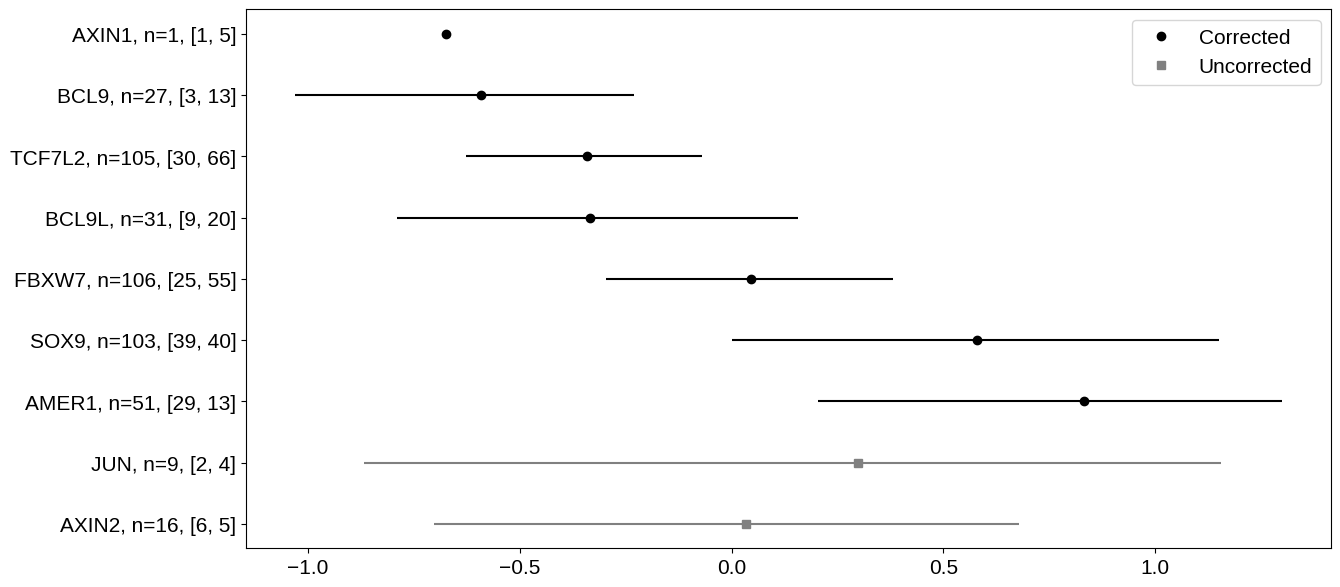

In [47]:
indi=np.argsort(corrected_deltas)[::-1]
#wnt_genes
#indi=np.delete(indi,1)
sorted_wnts=[wnt_genes_n[i] for i in indi]
#sorted_deltas=[deltas[i] for i in indi]
sorted_cdeltas=[corrected_deltas[i] for i in indi]
sorted_undeltas=[uncorrected_deltas[i] for i in indi]
sorted_ourdeltas=[our_corrected_deltas[i] for i in indi]


plt.figure(figsize=(14,7))
plt.rcParams.update({'font.size': 15})

plt.rcParams['font.family'] = 'Liberation Sans'


for i in [6,8]:
    #plt.hlines(wnt_genes_n[i],corrected_deltas_cl[i],corrected_deltas_ch[i],color='black')
    plt.hlines(wnt_genes_n[i],uncorrected_deltas_cl[i],uncorrected_deltas_ch[i],color='grey')

plt.plot(sorted_cdeltas[1:-1],sorted_wnts[1:-1],'ko',label='Corrected')
#plt.plot(sorted_ourdeltas,sorted_wnts,'r+',label='Corrected-Alternative')

plt.plot(sorted_undeltas[0],sorted_wnts[0],'s',color='grey',label='Uncorrected')
plt.plot(sorted_undeltas[-1],sorted_wnts[-1],'s',color='grey')#,label='Uncorrected')


#for i in indi:
    #plt.hlines(wnt_genes_n[i],corrected_deltas_cl[i],corrected_deltas_ch[i],color='black')
 #   plt.hlines(wnt_genes_n[i],our_corrected_deltas_cl[i],our_corrected_deltas_ch[i],color='red')
for i in [0,1,2,3,4,5]:
    plt.hlines(wnt_genes_n[i],corrected_deltas_cl[i],corrected_deltas_ch[i],color='black')
#    plt.hlines(wnt_genes_n[i],uncorrected_deltas_cl[i],uncorrected_deltas_ch[i],color='grey')
plt.xscale([-1.5,1.5])

plt.legend()
plt.savefig('wnts_corr.svg',bbox_inches='tight',dpi=300)

In [44]:
data=pd.DataFrame(data={'Wnt regulator':wnt_genes,'Total':unsizes,'[Prox, Dist]':sizes,'Corrected_Delta':corrected_deltas ,'CLowc':corrected_deltas_cl,'CHighc':corrected_deltas_ch, 'Uncorrected_Deltas':uncorrected_deltas,'CLowu':uncorrected_deltas_cl,'CHighu':uncorrected_deltas_ch, 'Corrected_Delta_Alternative':our_corrected_deltas ,'CLow':our_corrected_deltas_cl,'CHigh':our_corrected_deltas_ch})#,pd.DataFrame(data={'Genotype':types,'Probabilities':probs_s/sum(probs_s)})


In [45]:
data.to_csv('Deltas_Wnts_data.csv')

In [46]:
data

,Wnt regulator,Total,"[Prox, Dist]",Corrected_Delta,CLowc,CHighc,Uncorrected_Deltas,CLowu,CHighu,Corrected_Delta_Alternative,CLow,CHigh
0,AMER1,[51],"[29, 13]",0.832126,0.202954,1.297949,1.384621,0.649982,1.906859,0.966907,0.145369,1.599885
1,TCF7L2,[105],"[30, 66]",-0.342114,-0.625667,-0.070197,-0.689433,-0.931693,-0.467751,-0.411892,-0.741251,-0.087452
2,SOX9,[103],"[39, 40]",0.579801,0.001275,1.149125,0.604292,-0.005795,1.193027,0.623232,-0.101842,1.324946
3,FBXW7,[106],"[25, 55]",0.045773,-0.297345,0.380998,0.328679,-0.203071,0.908697,-0.036758,-0.403181,0.349703
4,BCL9,[27],"[3, 13]",-0.590363,-1.029294,-0.229742,-0.783924,-1.118172,-0.418177,-0.664716,-1.025243,-0.279135
5,BCL9L,[31],"[9, 20]",-0.334516,-0.789299,0.157790,-0.264928,-0.794291,0.248277,-0.387856,-0.874907,0.066528
6,AXIN2,[16],"[6, 5]",-0.918208,-1.340406,-0.524470,0.033506,-0.703174,0.677661,-0.948028,-1.363318,-0.560781
7,AXIN1,[1],"[1, 5]",-0.672541,-1.524060,-0.061287,NaN,NaN,NaN,-0.378409,-0.864598,0.096140
8,JUN,[9],"[2, 4]",NaN,NaN,NaN,0.297846,-0.866457,1.154116,NaN,NaN,NaN
